**Objetivos da aula:**

*   Conhecer o espaço de cor HSV
*   Conhecer o processo de mascara
*   conhecer o processo de detecção de contornos
*   conhecer o processo de calculo do centro de massa
*   conhecer o processo para desenar e escrever na imagem

In [ ]:
## Vou fazer o download das imagens do laboratório diretamente do repositório para ficar mais facil....

import requests
import os

# Define o laboratório
laboratorio = 'lab05'  ### altere para o laboratório desejado
diretorio = 'lab_images'  ### altere para o diretório que deseja salvar as imagens

# Download de um arquivo
def download_file(url, destination):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(destination, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
        print(f"Baixado: {destination}")
    else:
        print(f"Erro ao baixar {url}")

# Monta a URL completa
api_url = "https://api.github.com/repos/arnaldojr/cognitivecomputing/contents/material/aulas/PDI/"
url_completa = api_url + laboratorio
print(f"Fazendo o download de: {url_completa}")

# checa se a URL está acessível
response = requests.get(url_completa)
if response.status_code != 200:
    raise Exception(f"Erro ao acessar o repositório: {response.status_code}")
files = response.json()


# Faz o download de cada arquivo
os.makedirs(diretorio, exist_ok=True) # Cria a pasta downloads
for file in files:
    file_name = file['name']
    if file_name.endswith(('.png', '.jpg', '.jpeg', '.mp4')):  # Adicione mais extensões se necessário
        file_url = file['download_url']
        destination = os.path.join(diretorio, file_name)
        download_file(file_url, destination)

print(f"Download concluído. Arquivos salvos na pasta {diretorio}.")

Fazendo o download de: https://api.github.com/repos/arnaldojr/cognitivecomputing/contents/material/aulas/PDI/lab05
Baixado: lab_images/HSV_colorspace.jpg
Baixado: lab_images/bolinha.png
Baixado: lab_images/convolution.png
Baixado: lab_images/formas.png
Baixado: lab_images/formas_contorno.png
Baixado: lab_images/formas_contornor.png
Baixado: lab_images/hsv_colorspace.png
Baixado: lab_images/lena.png
Baixado: lab_images/melancia.png
Baixado: lab_images/melancia_filtrada.png
Baixado: lab_images/melancia_filtrada_rgb.png
Baixado: lab_images/saida.png
Baixado: lab_images/segmenta_melancia.mp4
Baixado: lab_images/sudoku.png
Baixado: lab_images/tux.png
Download concluído. Arquivos salvos na pasta lab_images.


### **Espaço de cor HSV**

Até o momento trabalhamos com imagens em escala de cinza, BGR, RGB e binaria. Agora vamos conhecer e trabalhar com HSV ou HSB.

    H - hue (matriz)
    S - saturation (saturação)
    V - value (Value) ou B - brightness (brilho)

Utilizar esse espaço possui algumas vantagens vamos ver no exemplo abaixo.

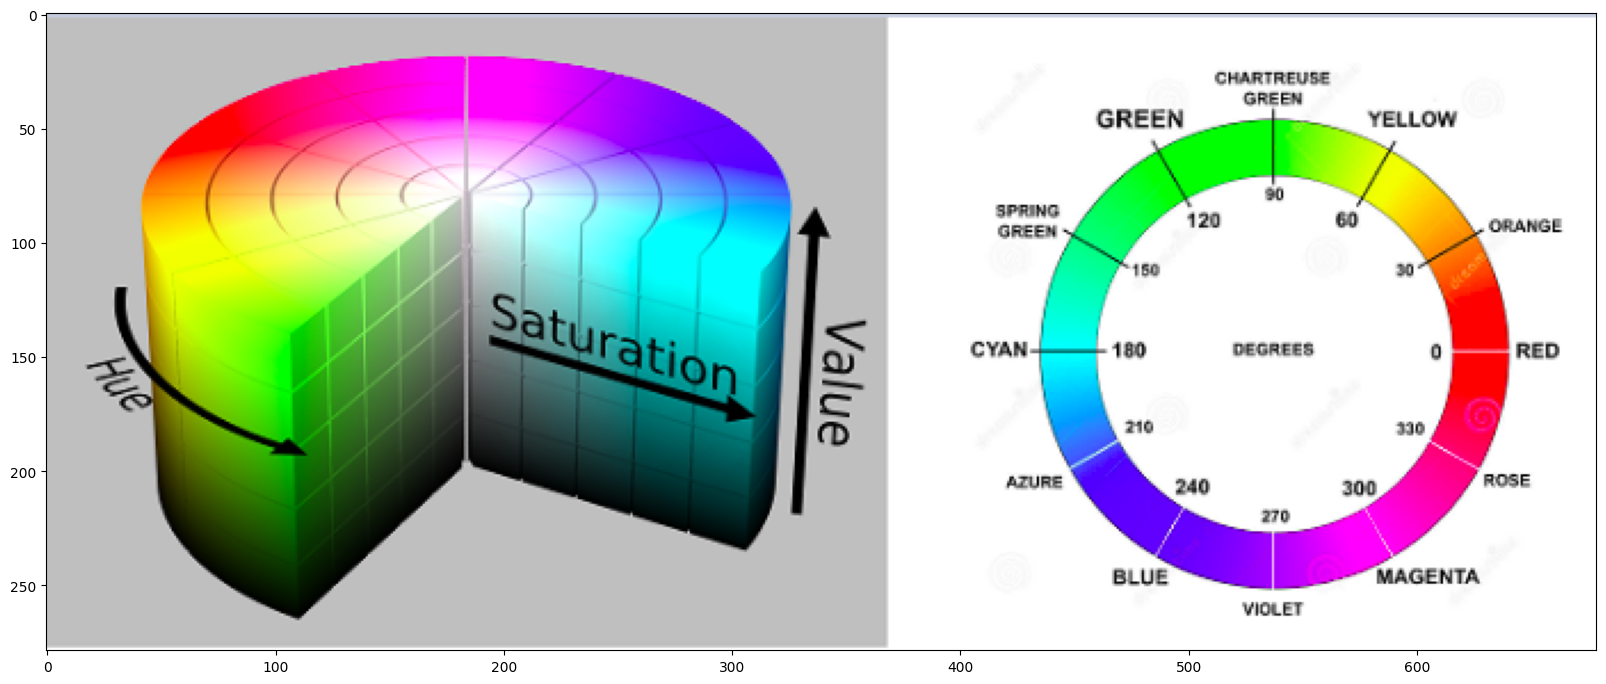

In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/hsv_colorspace.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (20,20))
plt.imshow(img); plt.show()

A **matiz** descreve o pigmento de uma cor e é medido em graus de 0 a 359 graus.

A **saturação** descreve a vivacidade ou o esmaecimento de uma cor e é medida em porcentagem de 0 a 100 (0 = cor "diluida" 100 = cor pura).

O **brilho** determina a intensidade percebida (0 = preto 100 = brilho maximo);

Dica: Pra entender bem o que é cada componente, da uma olhada neste [link](https://www.google.com/search?q=colorpicker&oq=colorpi&aqs=chrome.0.69i59j69i57j0l6j0i10l2.1862j0j7&sourceid=chrome&ie=UTF-8)
 ou digita no google "colorpicker"

***lembrete super importante!! a OpenCV trabalha com valores de 8bits (0-255), ou seja o valor da matriz tem que ser divido por 2***


**Conversão para HSV**

Na OpenCV a conversão de BGR para RGB é muito simples, podemos converter diretamete da imagem em BGR usando o **cv2.COLOR_BGR2HSV**.  

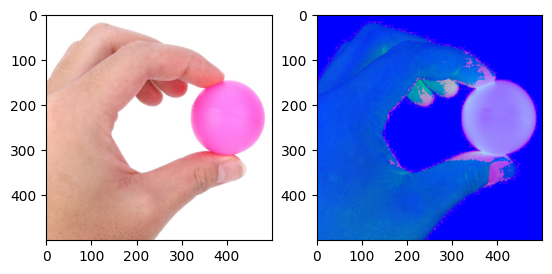

In [ ]:
img = cv2.imread('lab_images/bolinha.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(img_hsv)
plt.show()

**mascara de cor**

Para realizar uma marcara de cor, nos usamos a função **cv2.inrange** para escolher o intervalo de cor ( o valor minimo e o valor maximo).

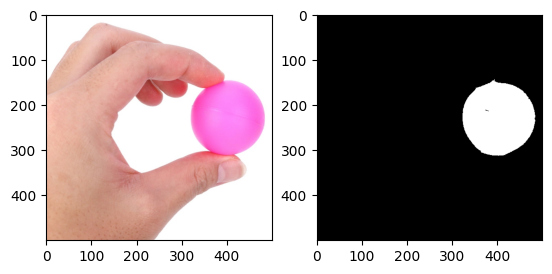

In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/bolinha.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Definição dos valores minimo e max da mascara
# o magenta tem h=300 mais ou menos ou 150 para a OpenCV
image_lower_hsv = np.array([140, 100, 40])
image_upper_hsv = np.array([175, 255, 255])


mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)



plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(mask_hsv, cmap="Greys_r", vmin=0, vmax=255)
plt.show()



### DESAFIO 1

Faça a segmentação da meia lua da imagem "melancia.png". O seu resultado deve ser proximo/parecido com a imagem "melancia_filtrada.png".  

Dica: talvez você precise usar mais que uma faixa de valores, se necessário use a função "cv2.bitwise_or" para juntar as partes.

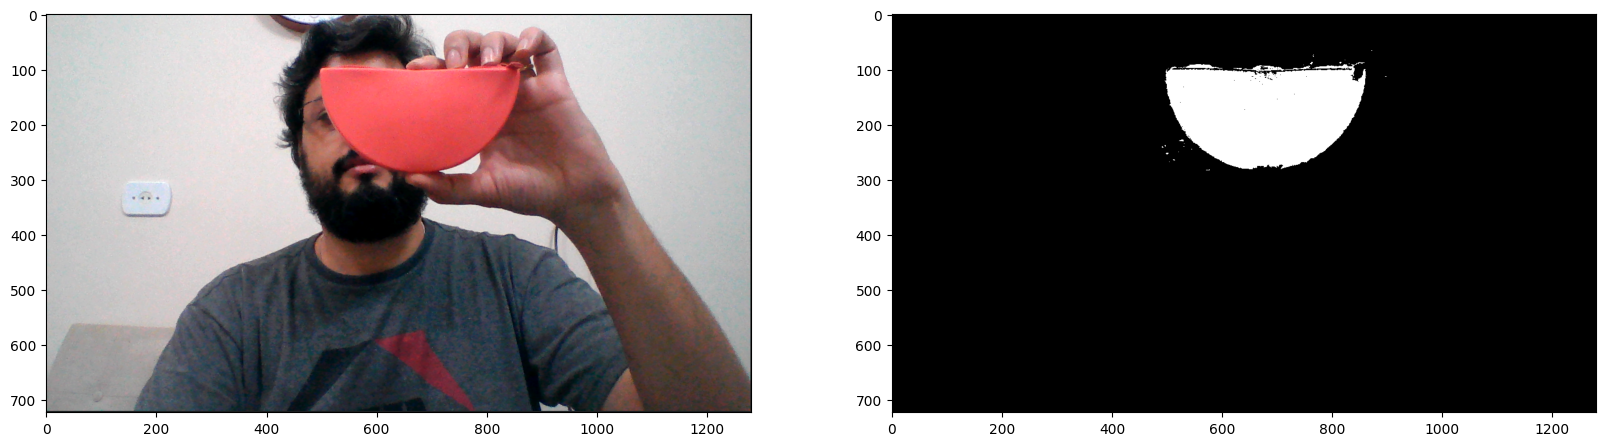

In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/melancia.png')
img_res = cv2.imread('lab_images/melancia_filtrada.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_res_rgb = cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB)


fig = plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(img_res_rgb)
plt.show()


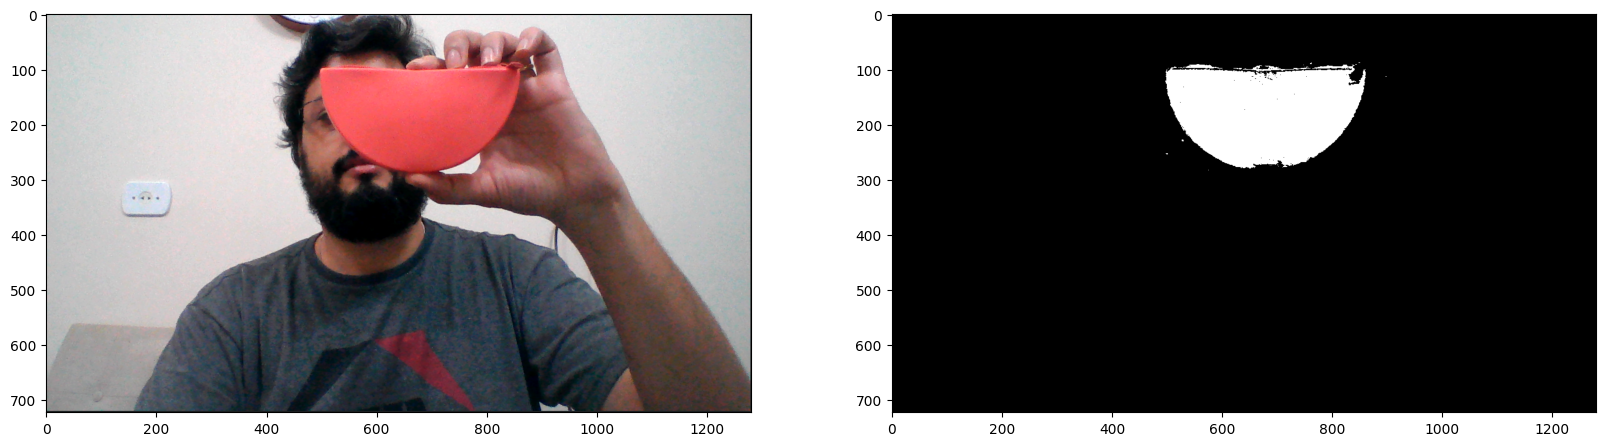

In [ ]:
#Implemente seu código


%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/melancia.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Definição dos valores minimo e max da mascara
# H entre vermelho e rosa
image_lower_hsv = np.array([0, 130, 200])
image_upper_hsv = np.array([185, 280, 255])


mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

fig = plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(mask_hsv, cmap="Greys_r")
plt.show()



### DESAFIO 2

Usando a imagem "melancia_filtrada.png", devolva a cor original que era antes da filtragem.

Dica: Use as funções de "cv2.bitwise_and" para juntar.

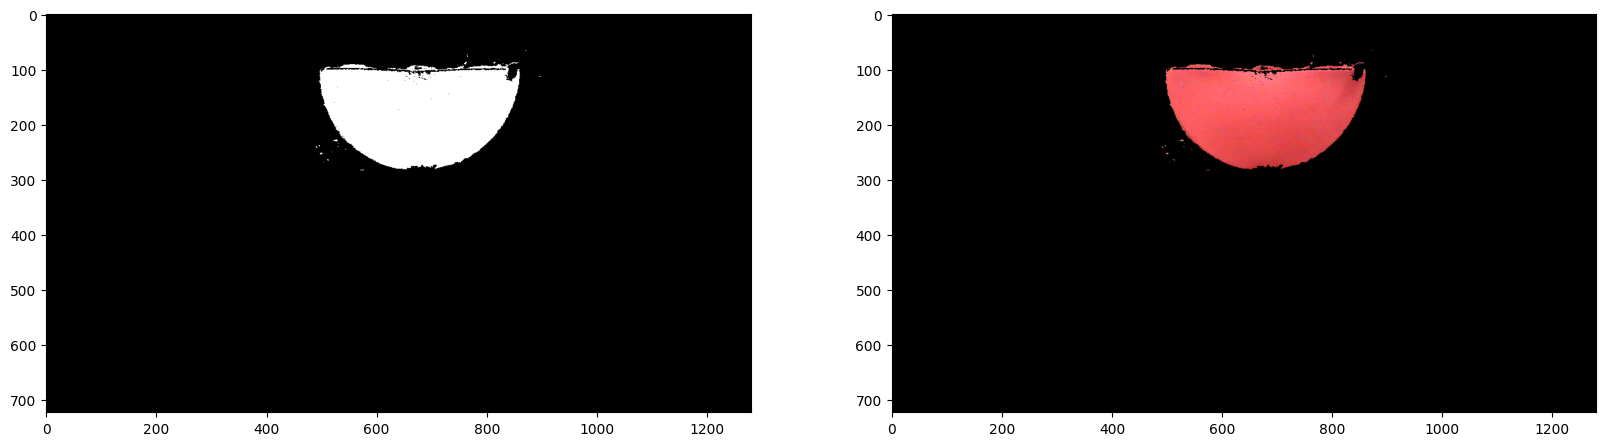

In [ ]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/melancia_filtrada.png')
img_res = cv2.imread('lab_images/melancia_filtrada_rgb.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_res_rgb = cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(img_res_rgb)
plt.show()

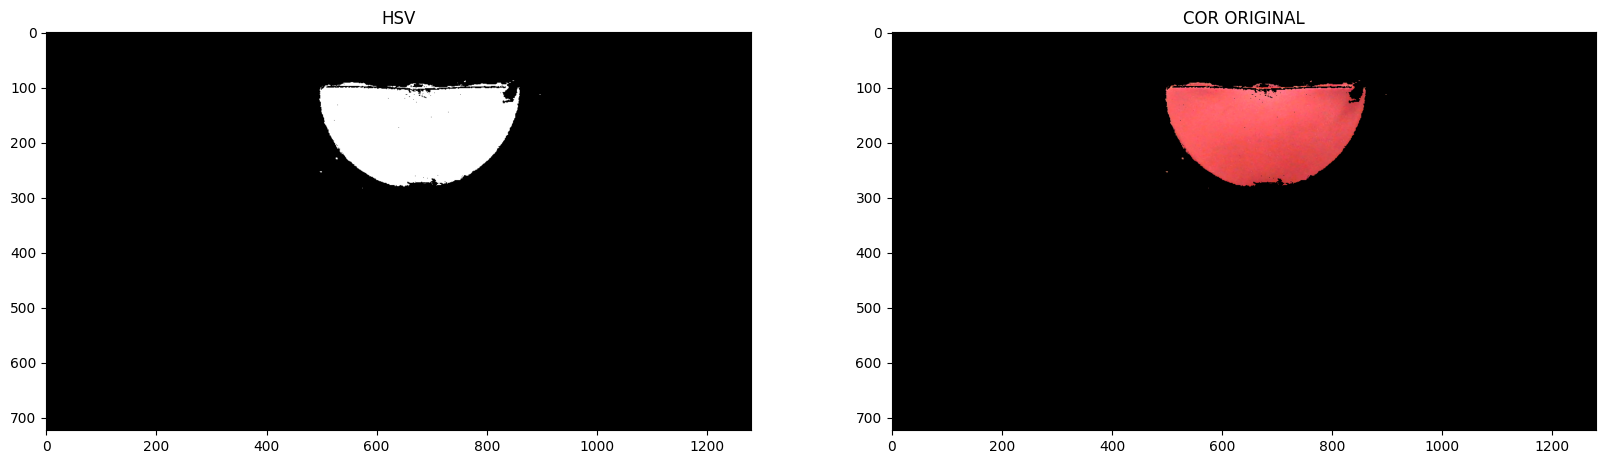

In [ ]:
#Implemente seu código

%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/melancia.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

image_lower_hsv = np.array([0, 130, 200])
image_upper_hsv = np.array([200, 255, 255])

mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

filtered_img = cv2.bitwise_and(img, img, mask=mask_hsv)
filtered_img_rgb = cv2.cvtColor(filtered_img, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(mask_hsv, cmap='gray')
plt.title('HSV')

plt.subplot(1, 2, 2)
plt.imshow(filtered_img_rgb)
plt.title('COR ORIGINAL')

plt.show()



## **DETECÇÃO DE CONTORNOS**

Para realizar a detecção dos contornos, ou bordas de um objeto, usamos a função **cv2.findontours**

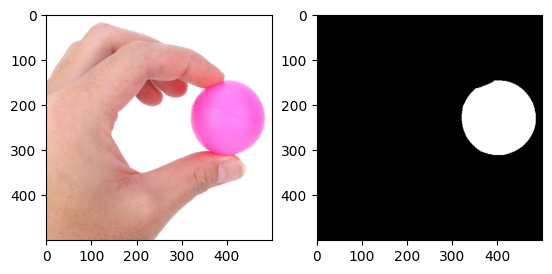

In [ ]:
#recarregando o nosso exemplo...

%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/bolinha.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Definição dos valores minimo e max da mascara
# o magenta tem h=300 mais ou menos ou 150 para a OpenCV
image_lower_hsv = np.array([140, 50, 100])
image_upper_hsv = np.array([170, 255, 255])


mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)



plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(mask_hsv, cmap="Greys_r", vmin=0, vmax=255)
plt.show()


In [ ]:
# realizando o contorno da imagem

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


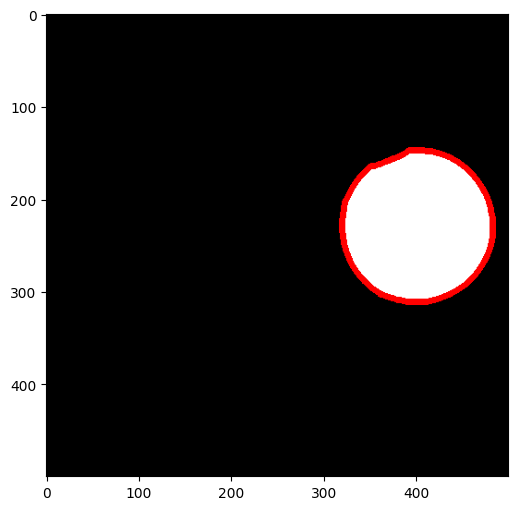

In [ ]:
# para desenhar o contorno primeiro faz uma copia da imagem

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB)
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);

plt.figure(figsize=(8,6))
plt.imshow(contornos_img);

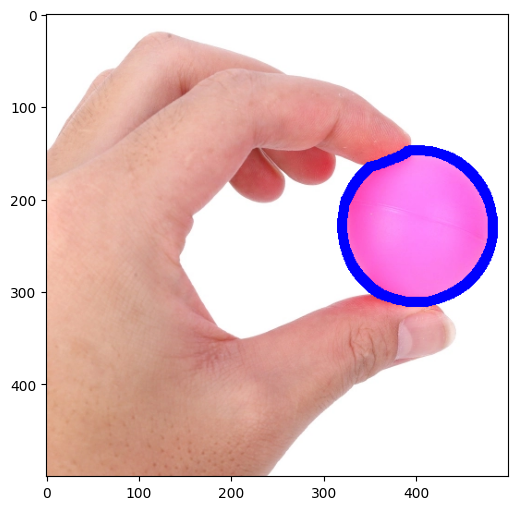

In [ ]:
# para desenhar o contorno primeiro faz uma copia da imagem

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB)
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(img_rgb, contornos, -1, [0, 0, 255], 10);

plt.figure(figsize=(8,6))
plt.imshow(img_rgb);

Note que a função findContours devolve uma lista com os contornos detectados.

In [ ]:
print("Quantidade de contornos encontrado: ", len(contornos))

Quantidade de contornos encontrado:  1


### DESAFIO 3

Usando a imagem "formas.png", faça um código que detecta todos os contornos da imagem. O resultado deve ser parecido com "formas_contorno.png"

Dica: Neste desafio, basicamente tem que ajustar a a mascara, o resto não muda.

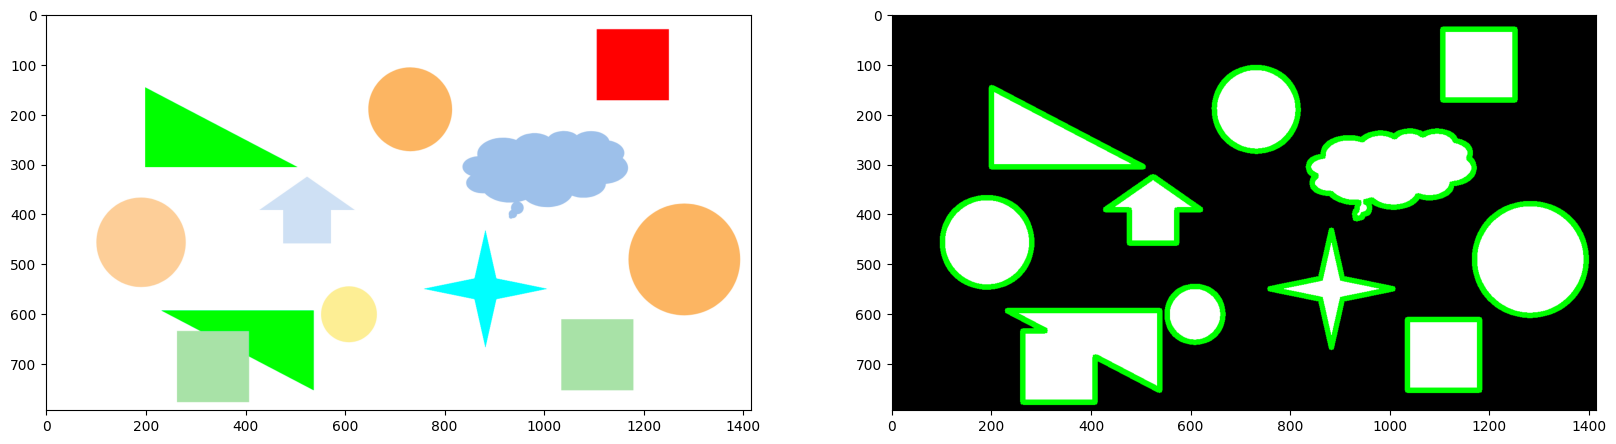

In [ ]:

%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/formas.png')
img_res = cv2.imread('lab_images/formas_contorno.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_res_rgb = cv2.cvtColor(img_res, cv2.COLOR_BGR2RGB)


# Definição dos valores minimo e max da mascara

image_lower_hsv = np.array([0, 1, 0])
image_upper_hsv = np.array([180, 255, 255])



fig = plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(img_res_rgb)
plt.show()

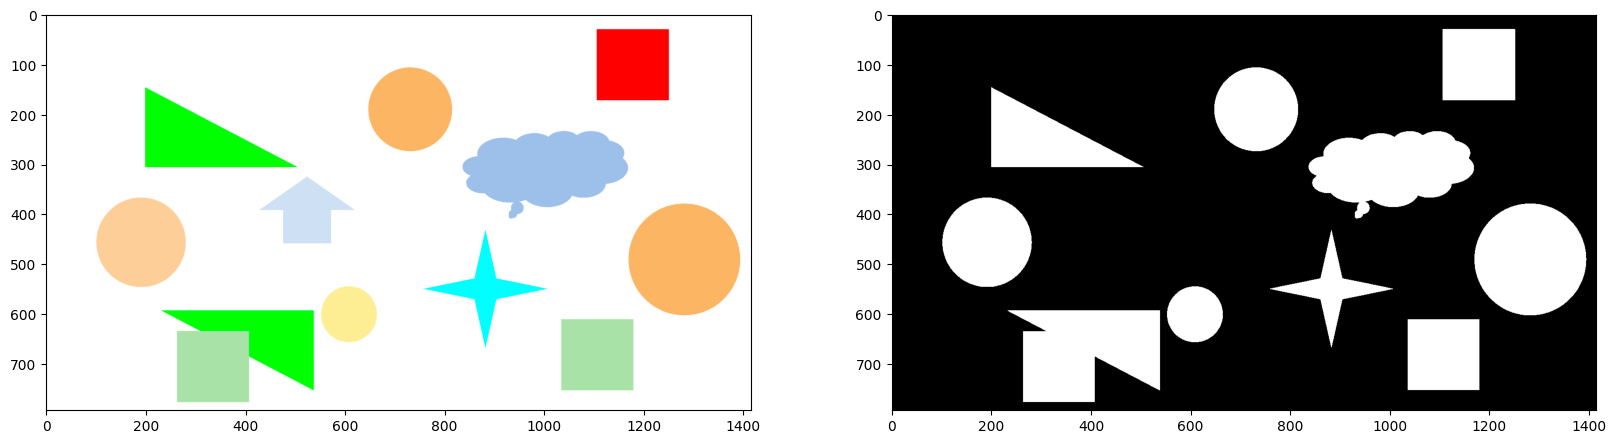

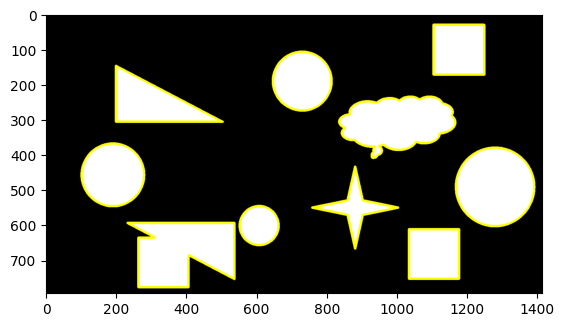

In [ ]:
#Implemente seu código


%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/formas.png')

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Definição dos valores minimo e max da mascara

image_lower_hsv = np.array([0, 50, 100])
image_upper_hsv = np.array([255, 255, 255])

mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
                                            #padrao          #padrao

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) # necessario mascara em RB pro contorno
contornos_img = mask_rgb.copy() # faz copia da mascara

cv2.drawContours(contornos_img, contornos, -1, [255, 255, 0], 5); # desenha  o contorno em RGB

fig = plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(mask_hsv, cmap="Greys_r")
plt.show()
plt.imshow(contornos_img);


### DESAFIO 4

Altere o seu codigo para desenhar o contorno de maior area da imagem. Use a função "cv2.contourArea()".

Referência da documentação: https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html

Dica: Use um for para varrer a lista e armazene o indice do maior valor e passe esse valor para desenhar o contorno.


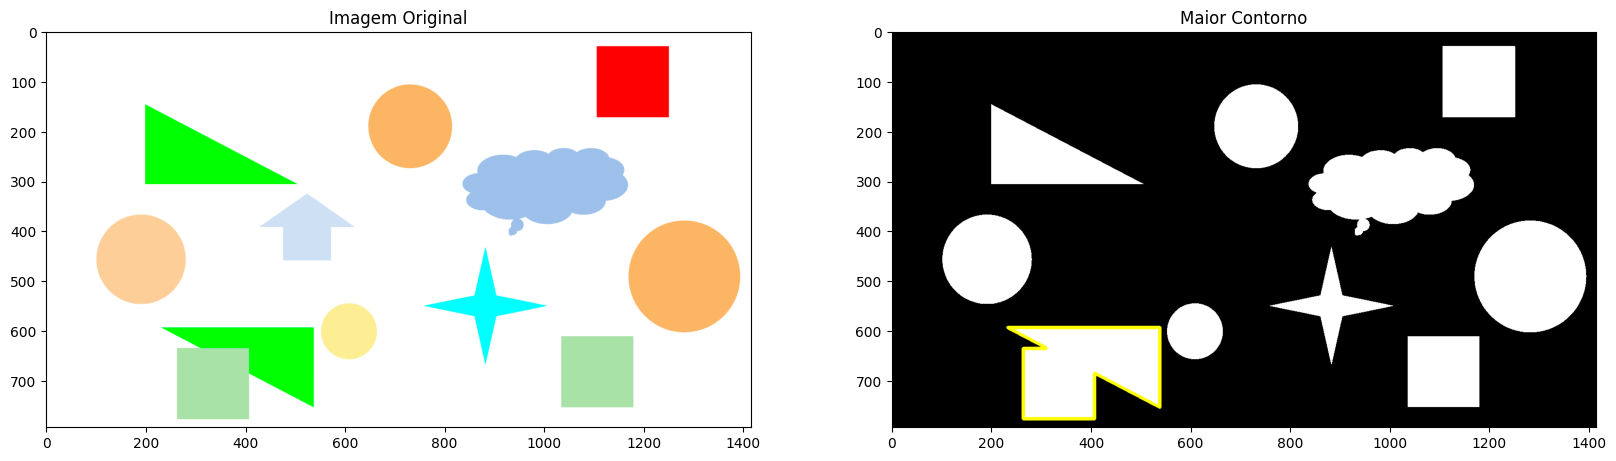

In [ ]:
## Implemente seu código

%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Carregar a imagem
img = cv2.imread('lab_images/formas.png')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Definir os valores mínimo e máximo para a máscara
image_lower_hsv = np.array([0, 50, 100])
image_upper_hsv = np.array([255, 255, 255])

# Criar a máscara
mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

# Encontrar contornos
contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Encontrar o contorno de maior área
maior_area = 0
maior_contorno = None
for contorno in contornos:
    area = cv2.contourArea(contorno)
    if area > maior_area:
        maior_area = area
        maior_contorno = contorno

# Criar uma cópia da máscara para desenhar o contorno
mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB)
contornos_img = mask_rgb.copy()

# Desenhar apenas o contorno de maior área

if maior_contorno is not None:                        #indice            #espessura da linha
    cv2.drawContours(contornos_img, [maior_contorno], -1, [255, 255, 0], 5)
                                    #lista de contornos    #cor do contorno (BGR)
# Exibir as imagens
fig = plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagem Original")

plt.subplot(1, 2, 2)
plt.imshow(contornos_img)
plt.title("Maior Contorno")

plt.show()




### **CENTRO DE MASSA DE UM OBJETO**

O calculo para o centro de massa é feito atráves da função **cv2.findontours**

In [ ]:
cv2.__version__

'4.5.5'

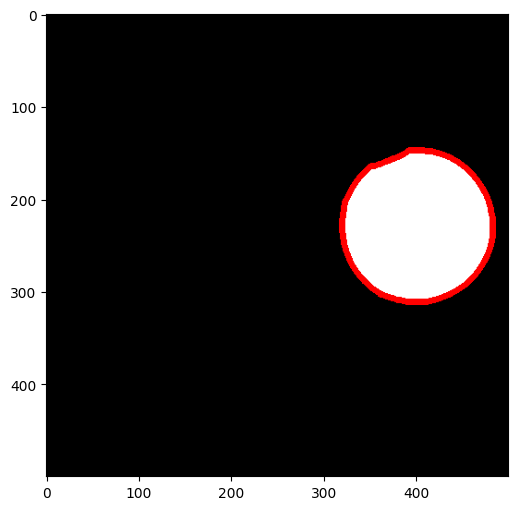

In [ ]:
#recarregando o nosso exemplo...

%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('lab_images/bolinha.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Definição dos valores minimo e max da mascara
# o magenta tem h=300 mais ou menos ou 150 para a OpenCV
image_lower_hsv = np.array([140, 50, 100])
image_upper_hsv = np.array([170, 255, 255])


mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB)
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);

plt.figure(figsize=(8,6))
plt.imshow(contornos_img);

In [ ]:
# usando o exemplo da documentação https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html
# notamos que a função devolve um dicionario.

cnt = contornos[0]

M = cv2.moments(cnt)
print( M )

{'m00': 20954.5, 'm10': 8414785.5, 'm01': 4813317.5, 'm20': 3414210172.083333, 'm11': 1932427931.625, 'm02': 1140509199.0833333, 'm30': 1399201096317.6501, 'm21': 783868070420.7833, 'm12': 457787216119.7167, 'm03': 278003040454.85004, 'mu20': 35049847.99971104, 'mu11': -475946.1051416397, 'mu02': 34874354.26211333, 'mu30': -7672941.9208984375, 'mu21': -4968840.380795479, 'mu12': 6858123.621509552, 'mu03': 2822544.575317383, 'nu20': 0.07982364109512664, 'nu11': -0.0010839348312655414, 'nu02': 0.07942396606302501, 'nu30': -0.00012071706132489804, 'nu21': -7.817390189392743e-05, 'nu12': 0.00010789766667418762, 'nu03': 4.4406603113053444e-05}


In [ ]:
# Calculo das coordenadas do centro de massa

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

print("centro de massa na possição: ",cx, cy)

centro de massa na possição:  401 229


 Vamos plotar isso na imagem para saber se esta correto. A função "cv2.line" vai nos ajudar a desenhar uma cruz. e função "cv2.putText" a escrever na imagem as coordenadas.

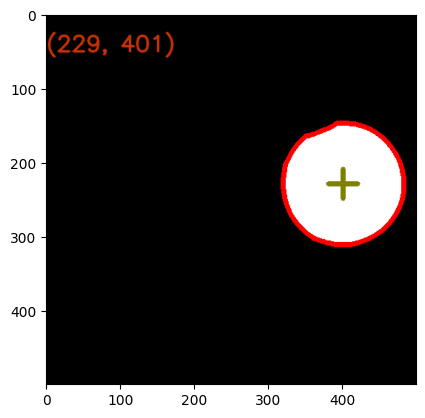

In [ ]:
## para desenhar a cruz vamos passar a cor e o tamanho em pixel
size = 20
color = (128,128,0)


cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

# Para escrever vamos definir uma fonte

font = cv2.FONT_HERSHEY_SIMPLEX
text = cy , cx
origem = (0,50)

cv2.putText(contornos_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


plt.imshow(contornos_img);

### DESAFIO 5

O desafio é juntar o que aprendemos em um video, use como base "webcam.py". Você deve seguimentar a cor de um objeto, encontrar seu contorno e montar a imagem segmentada com o centro de massa e suas coordenadas. Video de referência "segmenta_melancia.mp4"

In [ ]:
#### seu código aqui...

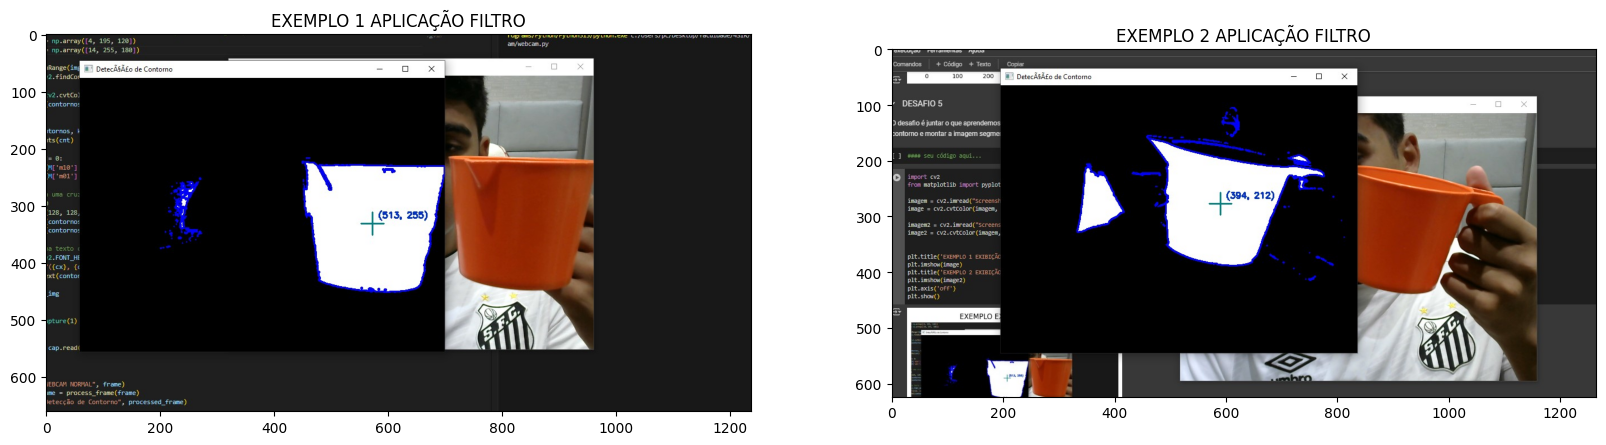

In [10]:
import cv2
from matplotlib import pyplot as plt

imagem = cv2.imread("Screenshot_2.jpg")
image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

imagem2 = cv2.imread("Screenshot_3.jpg")
image2 = cv2.cvtColor(imagem2, cv2.COLOR_BGR2RGB)


fig = plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('EXEMPLO 1 APLICAÇÃO FILTRO')

plt.subplot(1, 2, 2)
plt.imshow(image2)
plt.title('EXEMPLO 2 APLICAÇÃO FILTRO')

plt.show()

In [ ]:
## FEITO UPLOAD DE VIDEO NO NOTEBOOK, NOME: "segmentacao.mp4"

## CÓDIGO:

import cv2
import numpy as np

def process_frame(frame):
    img_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    image_lower_hsv = np.array([0, 150, 100])
    image_upper_hsv = np.array([20, 255, 200])


    mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)
    contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    contornos_img = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(contornos_img, contornos, -1, (255, 0, 0), 2)

    if contornos:
        cnt = max(contornos, key=cv2.contourArea)  # Pegando o maior contorno
        M = cv2.moments(cnt)

        if M['m00'] != 0:
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])

            # Desenha a cruz no centro de massa
            size = 20
            color = (128, 128, 0)
            cv2.line(contornos_img, (cx - size, cy), (cx + size, cy), color, 2)
            cv2.line(contornos_img, (cx, cy - size), (cx, cy + size), color, 2)

            # Adiciona texto com as coordenadas
            font = cv2.FONT_HERSHEY_SIMPLEX
            text = f"({cx}, {cy})"
            cv2.putText(contornos_img, text, (cx + 10, cy - 10), font, 0.5, (200, 50, 0), 2)

    return contornos_img

def main():
    #CAPTURA MINHA WEBCAM EXTERNA
    cap = cv2.VideoCapture(1)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        cv2.imshow("WEBCAM NORMAL", frame)
        processed_frame = process_frame(frame)
        cv2.imshow("Detecção de Contorno", processed_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()